Control group: Old recommendation system that did not use images well.

Treatment group: New recommendation system that uses hybrid recommendation.

## Objectives and metrics

Primary objective: Determine if the new recommendation algorithm contributes to a significant difference in the number of purchases.

Secondary objectives: Check if the new recommendation algorithm has impact on metrics like clicks, reach, and add to cart.

Metrics:

- Number of purchases (key metric)
- AddtoCart
- WebsiteClicks
- Reach
- Click-Through Rate (CTR)
- Conversion Rate


# Hypothesis 

Null Hypothesis: There is no difference between the old recommendation algorithm and the new recommendation algorithm

Alternative Hypothesis: There is a difference between the old recommendation algorithm and the new recommendation algorithm

### Data exploration 

In [313]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

We'll call the existing or the old recommendation algorithm customer readings as the control data and the new recommendation algorithm customer readings as the treatment data

In [314]:
control_data = pd.read_csv('control_group.csv', sep =";")
treatment_data = pd.read_csv('test_group.csv', sep =";")

In [315]:
print('Control group shape {}'.format(control_data.shape))
print('treatment group shape {}'.format(treatment_data.shape))
print(treatment_data.columns)

Control group shape (30, 10)
treatment group shape (30, 10)
Index(['Campaign Name', 'Date', 'Spend [USD]', '# of Impressions', 'Reach',
       '# of Website Clicks', '# of Searches', '# of View Content',
       '# of Add to Cart', '# of Purchase'],
      dtype='object')


The sample size of both groups is 30 containing 10 columns that capture various activities like the spend, number of clicks, searches, adds to cart etc.,

In [316]:
control_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Spend [USD],30.0,2288.433333,367.334451,1757.0,1945.5,2299.5,2532.0,3083.0
# of Impressions,29.0,109559.758621,21688.922908,71274.0,92029.0,113430.0,121332.0,145248.0
Reach,29.0,88844.931034,21832.349595,42859.0,74192.0,91579.0,102479.0,127852.0
# of Website Clicks,29.0,5320.793103,1757.369003,2277.0,4085.0,5224.0,6628.0,8137.0
# of Searches,29.0,2221.310345,866.089368,1001.0,1615.0,2390.0,2711.0,4891.0
# of View Content,29.0,1943.793103,777.545469,848.0,1249.0,1984.0,2421.0,4219.0
# of Add to Cart,29.0,1300.000000,407.457973,442.0,930.0,1339.0,1641.0,1913.0
# of Purchase,29.0,522.793103,185.028642,222.0,372.0,501.0,670.0,800.0


In [317]:
control_data.isna().sum() 

Campaign Name          0
Date                   0
Spend [USD]            0
# of Impressions       1
Reach                  1
# of Website Clicks    1
# of Searches          1
# of View Content      1
# of Add to Cart       1
# of Purchase          1
dtype: int64

There is a row of data missing soem features. We can go ahead and impute them with median (to be safe with outlier situation)

In [318]:
cols = ['# of Impressions', 'Reach', '# of Website Clicks', '# of Searches', '# of View Content', '# of Add to Cart', '# of Purchase']

In [319]:
for c in cols:
    control_data[c].fillna(value = control_data[c].median() ,inplace = True)

In [320]:
treatment_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Spend [USD],30.0,2563.066667,348.687681,1968.0,2324.50,2584.0,2836.25,3112.0
# of Impressions,30.0,74584.800000,32121.377422,22521.0,47541.25,68853.5,99500.00,133771.0
Reach,30.0,53491.566667,28795.775752,10598.0,31516.25,44219.5,78778.75,109834.0
# of Website Clicks,30.0,6032.333333,1708.567263,3038.0,4407.00,6242.5,7604.75,8264.0
# of Searches,30.0,2418.966667,388.742312,1854.0,2043.00,2395.5,2801.25,2978.0
# of View Content,30.0,1858.000000,597.654669,858.0,1320.00,1881.0,2412.00,2801.0
# of Add to Cart,30.0,881.533333,347.584248,278.0,582.50,974.0,1148.50,1391.0
# of Purchase,30.0,521.233333,211.047745,238.0,298.00,500.0,701.00,890.0


Some of these values seem to have outliers

In [321]:
control_data.head()

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
0,Control Campaign,1.08.2019,2280,82702.0,56930.0,7016.0,2290.0,2159.0,1819.0,618.0
1,Control Campaign,2.08.2019,1757,121040.0,102513.0,8110.0,2033.0,1841.0,1219.0,511.0
2,Control Campaign,3.08.2019,2343,131711.0,110862.0,6508.0,1737.0,1549.0,1134.0,372.0
3,Control Campaign,4.08.2019,1940,72878.0,61235.0,3065.0,1042.0,982.0,1183.0,340.0
4,Control Campaign,5.08.2019,1835,113430.0,91579.0,5224.0,2390.0,1984.0,1339.0,501.0


In [322]:
control_data['Campaign Name'] = control_data['Campaign Name'].apply(lambda x : 'Control' if x == 'Control Campaign' else '')

In [323]:
treatment_data.head()

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
0,Test Campaign,1.08.2019,3008,39550,35820,3038,1946,1069,894,255
1,Test Campaign,2.08.2019,2542,100719,91236,4657,2359,1548,879,677
2,Test Campaign,3.08.2019,2365,70263,45198,7885,2572,2367,1268,578
3,Test Campaign,4.08.2019,2710,78451,25937,4216,2216,1437,566,340
4,Test Campaign,5.08.2019,2297,114295,95138,5863,2106,858,956,768


In [324]:
treatment_data['Campaign Name'] = treatment_data['Campaign Name'].apply(lambda x : 'Treatment' if x == 'Test Campaign' else '')

### Datatypes

In [325]:
print(control_data.dtypes)
print(treatment_data.dtypes)

Campaign Name           object
Date                    object
Spend [USD]              int64
# of Impressions       float64
Reach                  float64
# of Website Clicks    float64
# of Searches          float64
# of View Content      float64
# of Add to Cart       float64
# of Purchase          float64
dtype: object
Campaign Name          object
Date                   object
Spend [USD]             int64
# of Impressions        int64
Reach                   int64
# of Website Clicks     int64
# of Searches           int64
# of View Content       int64
# of Add to Cart        int64
# of Purchase           int64
dtype: object


In [326]:
## Converting datat types for float columns to int

for c in cols:
    control_data[c] = control_data[c].astype('int64')

In [327]:
## Combining the two groups 

df = pd.concat([control_data, treatment_data], ignore_index=True)

In [328]:
df.head()

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
0,Control,1.08.2019,2280,82702,56930,7016,2290,2159,1819,618
1,Control,2.08.2019,1757,121040,102513,8110,2033,1841,1219,511
2,Control,3.08.2019,2343,131711,110862,6508,1737,1549,1134,372
3,Control,4.08.2019,1940,72878,61235,3065,1042,982,1183,340
4,Control,5.08.2019,1835,113430,91579,5224,2390,1984,1339,501


In [329]:
## Lets make the column names simpler

df.columns = df.columns.str.replace(' ','')
df.columns = df.columns.str.replace('#of','')


In [330]:
control_data.columns = control_data.columns.str.replace(' ','')
control_data.columns = control_data.columns.str.replace('#of','')

treatment_data.columns = control_data.columns.str.replace(' ','')
treatment_data.columns = control_data.columns.str.replace('#of','')

In [331]:
df.columns

Index(['CampaignName', 'Date', 'Spend[USD]', 'Impressions', 'Reach',
       'WebsiteClicks', 'Searches', 'ViewContent', 'AddtoCart', 'Purchase'],
      dtype='object')

In [332]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Spend[USD],60.0,2425.750000,381.130461,1757.0,2073.75,2420.5,2727.50,3112.0
Impressions,60.0,92136.783333,32309.932592,22521.0,69558.25,98281.0,117160.50,145248.0
Reach,60.0,71213.816667,30875.600780,10598.0,43235.50,77422.0,95314.25,127852.0
WebsiteClicks,60.0,5674.950000,1740.850030,2277.0,4230.75,5581.0,7201.25,8264.0
Searches,60.0,2322.950000,663.404916,1001.0,1970.75,2390.0,2755.75,4891.0
ViewContent,60.0,1901.566667,681.500622,848.0,1249.00,1979.5,2422.50,4219.0
AddtoCart,60.0,1091.416667,427.780567,278.0,863.25,1082.5,1384.25,1913.0
Purchase,60.0,521.650000,195.316330,222.0,340.00,501.0,685.00,890.0


In [333]:
numerical_cols = ['Spend[USD]', 'Impressions', 'Reach','WebsiteClicks', 'Searches', 
                'ViewContent', 'AddtoCart', 'Purchase']

## Distributions

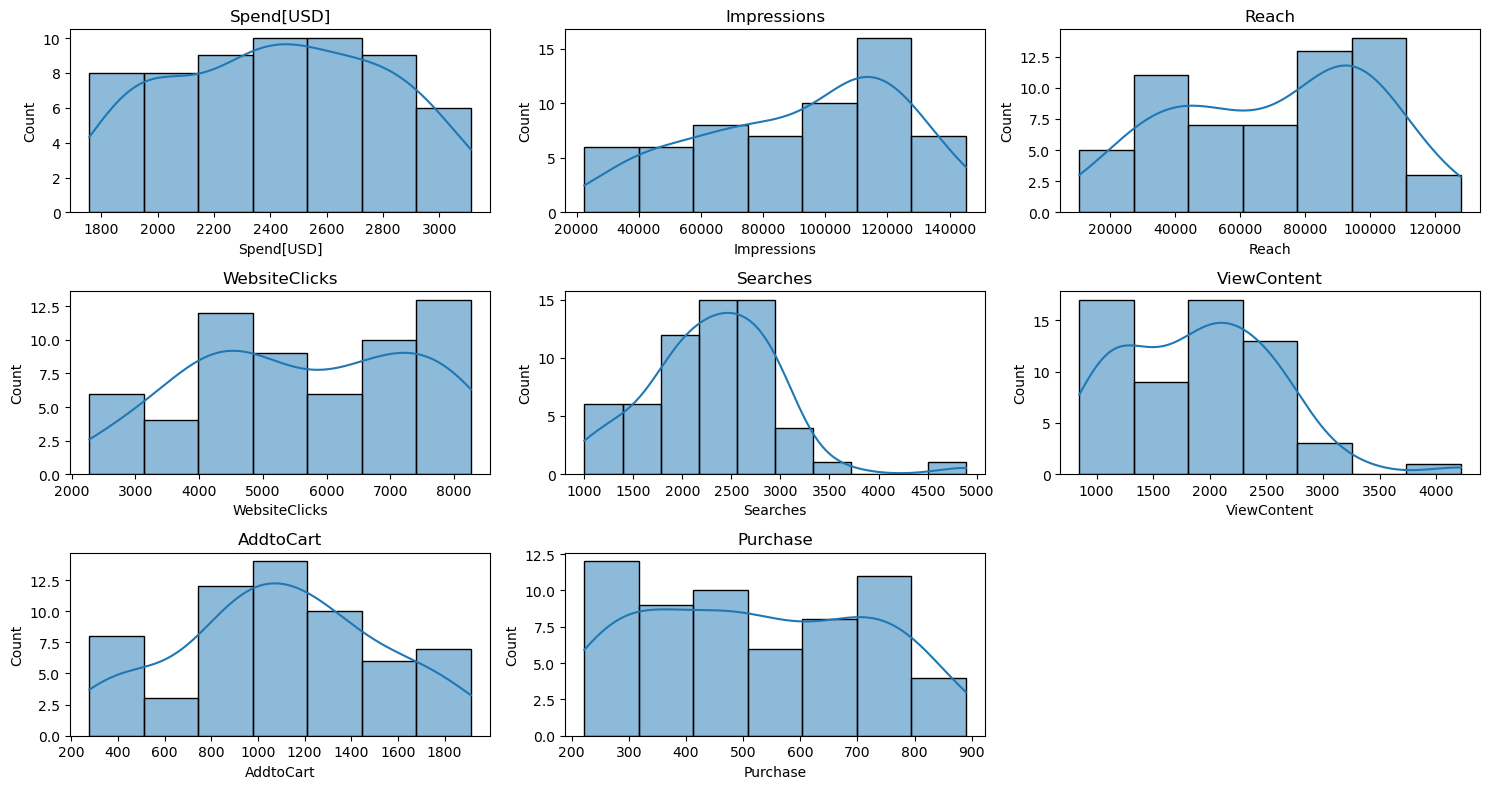

In [334]:
fig, axs = plt.subplots(nrows=3,ncols=3, figsize=(15,8))
axs = axs.flatten()


for i, n in enumerate(numerical_cols):
    sns.histplot(data = df, x = n, kde = True, ax = axs[i])
    axs[i].set_title(n)
fig.delaxes(axs[8])
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Control group correlation')

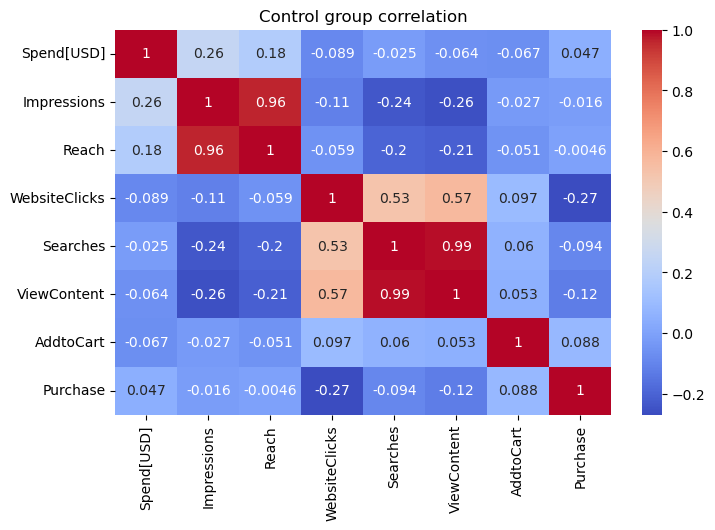

In [335]:
## correlation of different features for treatment and control groups
plt.figure(figsize = (8,5))
sns.heatmap(df[df['CampaignName'] == 'Control'][numerical_cols].corr(), annot=True, cmap="coolwarm").set_title('Control group correlation')


With the old recommendation algo, there was a strong correlation between impressions and reach. Most people who saw the ad (impression) actually saw the content. But this didn't really mena they would add to cart or purchase. 
There is good correlation between website clikcs and searches AND website clikcs with viewcontent

Text(0.5, 1.0, 'Treatment group correlation')

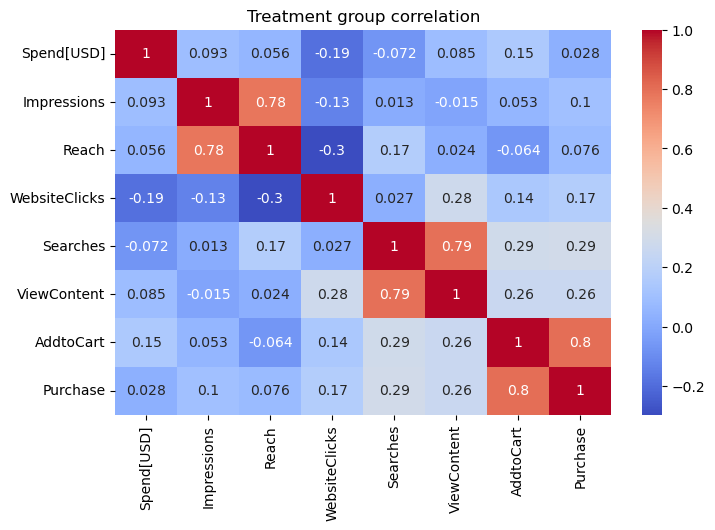

In [336]:
plt.figure(figsize = (8,5))
sns.heatmap(df[df['CampaignName'] == 'Treatment'][numerical_cols].corr(), annot=True, cmap="coolwarm").set_title('Treatment group correlation')

- With the treatment group, there is a string correlation between impressions and reach but not as strong as with the control group. Interestingly, we observe strong correlation between Add to cart and purchase. It means that if users are adding to cart, then they're most likely purchasing.

- With the treatment group, we also see a correlation flare up between Spend and add to cart which was absent in control group. Same case with seaches and add to cart AND ViewContent and add to cart. WHich means that the new recommendation algorithm could be doing a good job in showing what the users wanted.

- To conclude, the cpntrol group seems to have a much better foo-trafiic conversion compared to the treatment group.
Treatment group seems to actually have really good sales conversion than control group.

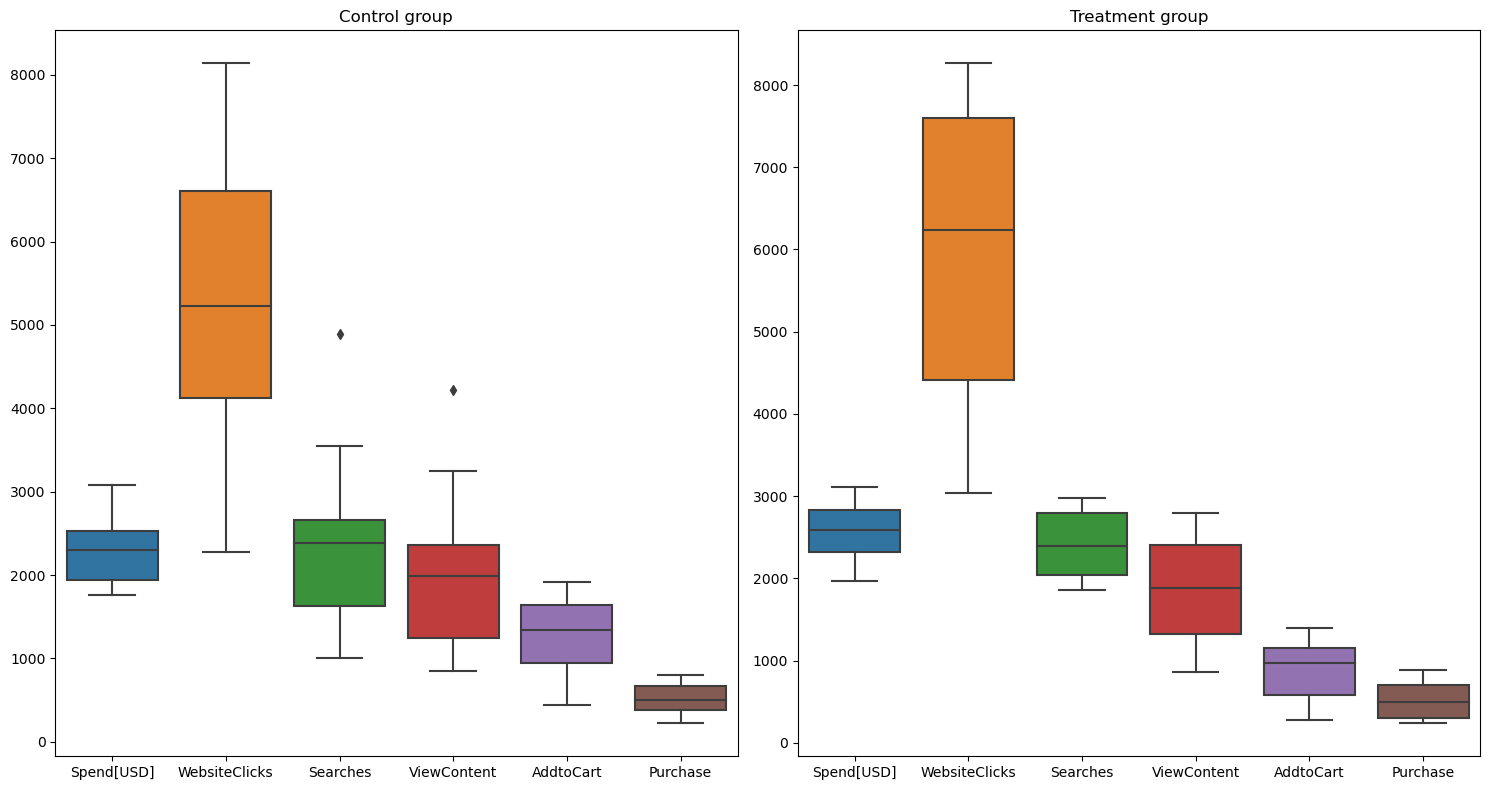

In [337]:
## Outliers

fig, axs = plt.subplots(nrows=1,ncols=2, figsize=(15,8))
axs = axs.flatten()

num_cols = numerical_cols.copy()
num_cols.remove('Impressions')
num_cols.remove('Reach')

#for i in range(2):
sns.boxplot(data = control_data[num_cols], ax = axs.flatten()[0])
sns.boxplot(data = treatment_data[num_cols], ax = axs.flatten()[1])
axs[0].set_title('Control group')
axs[1].set_title('Treatment group')
plt.tight_layout() 
plt.show()

- Spend: the median spend is much higher with treatment group
- Website Clicks: the range is much higher and the median is also much higher with treatment group compared to control group
- Searches: the range is much smaller but control has little more searches compared to treatment. Control group does have outliers here.
- View Content: This is slightly higher with treatment group. Control group does have outliers here.
- Add to Cart: This is clearly higher in number in control group than treatment group. Surprising as the clicks, and view content is much higher with treatment group.
- Purchase: They're almost equal here.


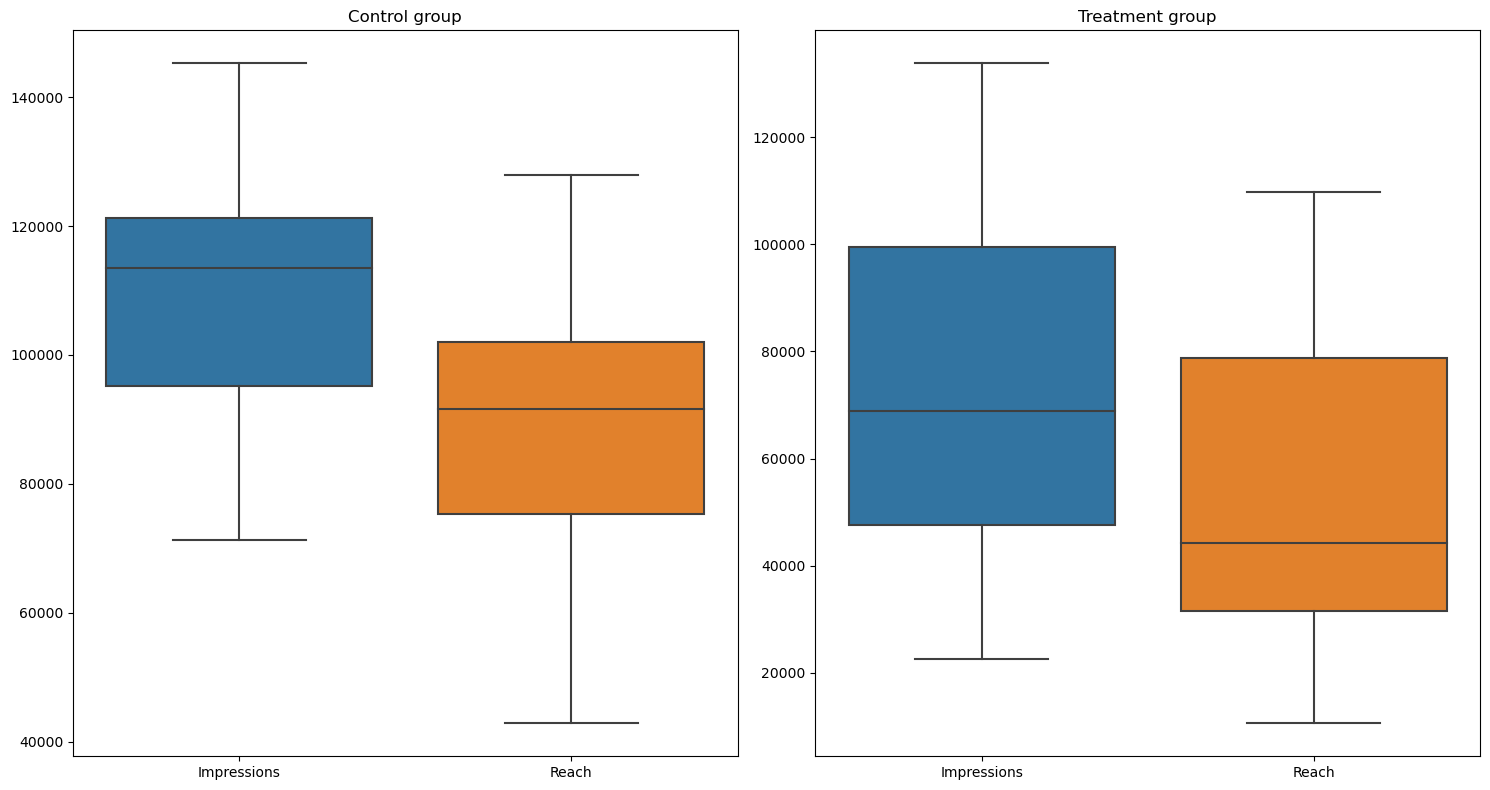

In [338]:

fig, axs = plt.subplots(nrows=1,ncols=2, figsize=(15,8))
axs = axs.flatten()
sns.boxplot(data = control_data[['Impressions','Reach']], ax = axs.flatten()[0])
sns.boxplot(data = treatment_data[['Impressions','Reach']], ax = axs.flatten()[1])
axs[0].set_title('Control group')
axs[1].set_title('Treatment group')
plt.tight_layout() 
plt.show()

Even the impressions and reach are much higher with control group and treatment group. 
SO far, the control recommendation seems to be doing much better compared to the treatment group. But we still need to prove this statistically because this could be due to random chance. This will that the differences observed are truly due to the changes being tested and not just random variation or other confounding factors.

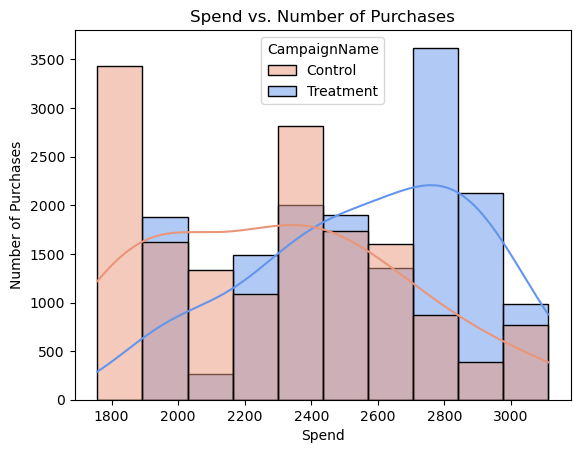

In [339]:
sns.histplot(data=df, x="Spend[USD]", weights="Purchase", kde=True, hue="CampaignName", palette={'Control': 'darksalmon', 'Treatment': 'cornflowerblue'}, alpha = 0.5)
plt.xlabel('Spend')
plt.ylabel('Number of Purchases')
plt.title('Spend vs. Number of Purchases')
plt.show()

It can be observed that treatment group recommendation algo has more money spending compared to control which has much lesser expenditure but more purchases. 
It seems like more money spent on treatment group, more purchases but on the ther hand lesser money spent with control group resulted in more purchases. 

## Statistical testing

Statistical testing is really important here to understand if the difference in the above metrics is due to chance or if it actually is the case.

Reiterating,

**Null Hypothesis**: There is no difference between number of purchases with the introduction of new recommendation algorithm -- there is no difference in number of purchases between old recommendation algorithm (control group/campaign) and new recommendation algorithm (treatment group/campaign)

**Alternate Hypothesis**: New recommendation algorithm (Treatment group/campaign results) results in higher number of purchases compared to control group/campaign


Two-sample t test can be applied if the data in each group is normally distributed.

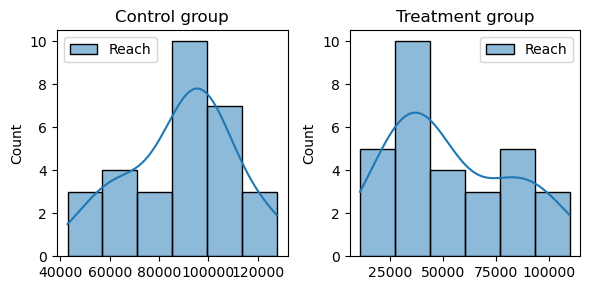

In [340]:
fig, axs = plt.subplots(nrows=1,ncols=2, figsize=(6,3))
axs = axs.flatten()
sns.histplot(data = control_data[['Reach']], ax = axs.flatten()[0], kde = True)
sns.histplot(data = treatment_data[['Reach']], ax = axs.flatten()[1], kde = True)
axs[0].set_title('Control group')
axs[1].set_title('Treatment group')
plt.tight_layout() 
plt.show()

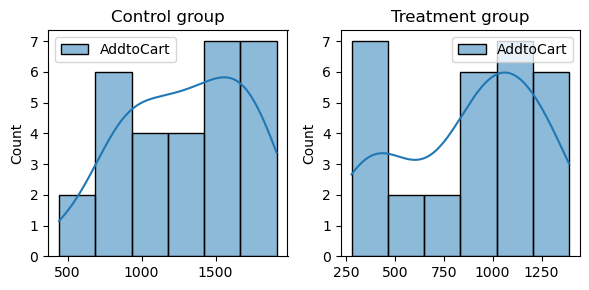

In [341]:
fig, axs = plt.subplots(nrows=1,ncols=2, figsize=(6,3))
axs = axs.flatten()
sns.histplot(data = control_data[['AddtoCart']], ax = axs.flatten()[0], kde = True)
sns.histplot(data = treatment_data[['AddtoCart']], ax = axs.flatten()[1], kde = True)
axs[0].set_title('Control group')
axs[1].set_title('Treatment group')
plt.tight_layout() 
plt.show()

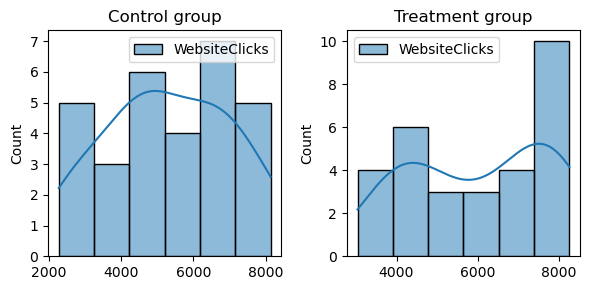

In [342]:
fig, axs = plt.subplots(nrows=1,ncols=2, figsize=(6,3))
axs = axs.flatten()
sns.histplot(data = control_data[['WebsiteClicks']], ax = axs.flatten()[0], kde = True)
sns.histplot(data = treatment_data[['WebsiteClicks']], ax = axs.flatten()[1], kde = True)
axs[0].set_title('Control group')
axs[1].set_title('Treatment group')
plt.tight_layout() 
plt.show()

In [343]:
## applying log-transformation to both the groups 
import numpy as np

features = ['WebsiteClicks', 'Reach', 'AddtoCart']

for f in features:
    df['log_'+f] = np.log(df[f])

In [344]:
from scipy.stats import shapiro
alpha = 0.05 # significance level

def Check_if_Normally_Distributed(metric):
    '''Function to check if the data in the desired metric is normally distributed'''
    _, p_value = shapiro(df[metric])
    print(f'\n{metric} Normality p-value: {p_value}')
    if p_value > alpha:
        print(f"{metric} is approximately normally distributed.")
    else:
        print(f"{metric} is not normally distributed.")

In [345]:
for metric in ['log_WebsiteClicks', 'log_Reach', 'log_AddtoCart']:
    Check_if_Normally_Distributed(metric)


log_WebsiteClicks Normality p-value: 0.0028316958341747522
log_WebsiteClicks is not normally distributed.

log_Reach Normality p-value: 3.10516006720718e-05
log_Reach is not normally distributed.

log_AddtoCart Normality p-value: 0.00032092808396555483
log_AddtoCart is not normally distributed.


In [346]:
for metric in ['WebsiteClicks', 'Reach', 'AddtoCart']:
    Check_if_Normally_Distributed(metric)


WebsiteClicks Normality p-value: 0.012037001550197601
WebsiteClicks is not normally distributed.

Reach Normality p-value: 0.03994819149374962
Reach is not normally distributed.

AddtoCart Normality p-value: 0.27991917729377747
AddtoCart is approximately normally distributed.


## Two Sample T-Test 

Compares the means of two independent groups to determine if they are significantly different from each other. Compares the means of two independent groups to determine if they are significantly different from each other.

In [347]:
from scipy.stats import ttest_ind

def Run_Two_Sample_TTest(metric):
    '''Function to run Two Sample T-Test with desired metric'''
    treatment_metric = df[df['CampaignName'] == 'Treatment'][metric]
    control_metric  = df[df['CampaignName'] == 'Control'][metric]
    
    t_stat, p_value = ttest_ind(treatment_metric, control_metric) 
    print(f'\nT-statistic: {t_stat}')
    print(f'p-value: {p_value}')

    if p_value < alpha:
        print(f"The difference in {metric} rates between Treatment and Control is statistically significant.")
    else:
        print(f"There is no significant difference in {metric} rates between Treatment and Control.")
    
    print('\n')
    print('**********************************')

In [348]:
for metric in ['log_WebsiteClicks', 'log_Reach', 'log_AddtoCart']:
    Run_Two_Sample_TTest(metric)


T-statistic: 1.6383152653379442
p-value: 0.10677020469396838
There is no significant difference in log_WebsiteClicks rates between Treatment and Control.


**********************************

T-statistic: -5.197863067707358
p-value: 2.732313915063475e-06
The difference in log_Reach rates between Treatment and Control is statistically significant.


**********************************

T-statistic: -3.9349129979197195
p-value: 0.0002251751344687061
The difference in log_AddtoCart rates between Treatment and Control is statistically significant.


**********************************


- Cost Per Acquisition (CPA)
    - The average cost to acquire a customer.
    - Lower CPA values are preferable, indicating that the campaign is cost-effective in acquiring new customers.
- Return on Investment (ROI)
    - Measures the profitability of an investment (amount spent on advertising).
    - A higher ROI is preferable, indicating better profitability and efficiency of the investment. (Negative ROI indicates loss)
- Conversion Rate
    - Measures the percentage of users who take a desired action (in our case, it is making a purchase) out of the total number of users.
    - Higher conersion rates are preferabel, indicating that a higher percentage of users are taking the desired action after clicking on the link.
- Click-Through Rate (CTR)
    - The ratio of users who click on a specific link to the number of total users who view an advertisement (measures the effectiveness of an online advertising campaign)
    - A higher CTR is preferable, indicating that a higher percentage of users are clicking on the link compared to those who just view it.

Let's say on an average a peice of clothing costs 20$ or so. Let's consider this for computing ROI

In [349]:
CPA = (df['Spend[USD]'].sum() / df['Purchase'].sum())

print(f"Total Spend: ${df['Spend[USD]'].sum()}")
print(f"Total Purchases: {df['Purchase'].sum()}")
print(f"Cost Per Acquisition (CPA): ${CPA:.2f}")

Total Spend: $145545
Total Purchases: 31299
Cost Per Acquisition (CPA): $4.65


In [350]:
df['ROI'] = ((df['Purchase']*20 - df['Spend[USD]']) / df['Spend[USD]']) * 100
df['ConversionRate'] = (df['Purchase'] / df['WebsiteClicks']) * 100
df['CTR'] = (df['WebsiteClicks'] / df['Impressions']) * 100
df[['CampaignName','ROI','ConversionRate', 'CTR']].sample(5)

,CampaignName,ROI,ConversionRate,CTR
32,Treatment,388.794926,7.330374,11.222123
31,Treatment,432.651456,14.537256,4.623755
28,Control,181.263158,4.109758,8.830912
33,Treatment,150.922509,8.064516,5.374055
30,Treatment,69.547872,8.393680,7.681416


In [351]:
df[['CampaignName','ROI','ConversionRate', 'CTR']].describe().T


,count,mean,std,min,25%,50%,75%,max
ROI,60.0,339.985458,178.544125,57.455013,166.994551,325.185905,470.176942,787.409872
ConversionRate,60.0,10.322745,5.761175,3.008850,6.347943,8.828477,13.026990,32.235397
CTR,60.0,7.660892,5.595556,1.857546,4.315104,6.076425,8.437011,33.821766


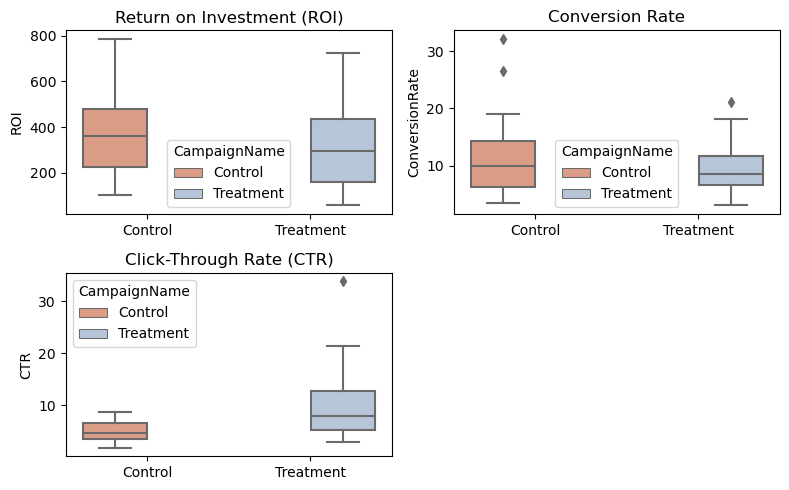

In [352]:
fig, axes = plt.subplots(2, 2, figsize=(8, 5))

sns.boxplot(x="CampaignName", y="ROI", data=df, ax=axes[0, 0], hue="CampaignName", palette = ['darksalmon', 'lightsteelblue']).set_title("Return on Investment (ROI)")
axes[0, 0].set_xlabel("") 

sns.boxplot(x="CampaignName", y="ConversionRate", data=df, ax=axes[0, 1], hue="CampaignName", palette = ['darksalmon', 'lightsteelblue']).set_title("Conversion Rate")
axes[0, 1].set_xlabel("")  

sns.boxplot(x="CampaignName", y="CTR", data=df, ax=axes[1, 0], hue="CampaignName", palette = ['darksalmon', 'lightsteelblue']).set_title("Click-Through Rate (CTR)")
axes[1, 0].set_xlabel("") 

fig.delaxes(axes[1, 1])
plt.tight_layout()
plt.show()

- ROI: Control group has slightly higher ROI compared to Treatment group
- Conversion Rate: Control group is better here
- CTR: Treatment is clearly doing better here

Again, let's run two sample t test on these metrics but lets check if these are normally distributed

In [353]:
for metric in ['ROI', 'ConversionRate', 'CTR']:
    Check_if_Normally_Distributed(metric)


ROI Normality p-value: 0.03727106377482414
ROI is not normally distributed.

ConversionRate Normality p-value: 5.90195668337401e-05
ConversionRate is not normally distributed.

CTR Normality p-value: 2.216172845237452e-08
CTR is not normally distributed.


In [354]:
for metric in ['ConversionRate', 'CTR']:
    df[metric] = np.log(df[metric])

In [355]:
for metric in ['ROI', 'ConversionRate', 'CTR']:
    Run_Two_Sample_TTest(metric)


T-statistic: -1.167594603726903
p-value: 0.24774791968302803
There is no significant difference in ROI rates between Treatment and Control.


**********************************

T-statistic: -1.203856508298326
p-value: 0.23353534470202628
There is no significant difference in ConversionRate rates between Treatment and Control.


**********************************

T-statistic: 4.514923862390539
p-value: 3.154313682281303e-05
The difference in CTR rates between Treatment and Control is statistically significant.


**********************************


## Putting it all together:


Old recommendation algorithm: Although the reach and impressions are more witht his algorithm, it is not resulting in higher add to carts or purchase. But it does have higher ROI.

New recommendation algorithm: This is doing really well in converting viewers to customers. It also higher click through rate.
Add to cart is also significantly more with new recommendation algorithm. Suggesting that the new algorithm is doing a good job in recommending products 

## Recommendation

The new algorithm is doing well in terms of customers purchasing but it could do better in-terms of reaching a wider audience. It also has a strong correlation between addting to cart and purchasing. Also, a good correlation between searches , viewcontent and add to cart.
Maybe looking at new marketing or advertising strategy to get better webiste clicks, reach, and impressions could result in more add to carts and purchases.

On the other hand, the old recommendation does have a better number of add to carts compared to the new algo. This needs further investigation as the data could be biased/customer base could be biased. It does have higher ROI because the expensiture on this strategy seems much less. 

In my opinion, the new algorithm is doing well in terms of recommending products (as seen by strong correlation between add to cart/purchase, seaches/add to cart, and view content/add to cart). But this group is falling short in terms of reaching audience and in general it also seems an expensive strategy when comapred with old startegy. As stated above, with new marketing techniques and further testing, the new algo could help the company with more add to carts/purchases.

## Future work

Conduct further analysis, maybe time series, to understand how the new algorithm is performing.

Analyze results further by looking at segments of customers (age, demographics etc) based on purchase history.